In [1]:
# Para utilizar ferramentas matemáticas
import numpy as np

# Para visualização com estilo MATBLAB
import matplotlib.pyplot as plt

# Para utilizar simulador e hardware quântico real
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram

# Número de qubits para representar a string binária s
n = 6

# String binária s a ser descoberta
s = '001011'   

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
creg = ClassicalRegister(n, name='c')
bv_circuit = QuantumCircuit(reg_x, reg_a, creg)

# Inclui as portas Hadamard antes de perguntar ao oráculo
for i in range(n):
    bv_circuit.h(i)

# Coloca o qubit ancilla no estado |->
bv_circuit.x(n)
bv_circuit.h(n)

# Inclui uma barra para facilitar a visualização do circuito
bv_circuit.barrier()

# Constrói o oráculo
# Se o qubit de s que está sendo analisado for 0, adiciona uma porta identidade
# Se for 1, adiciona porta CNOT com qubit ancilla como alvo
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Inclui uma barra para facilitar a visualização do circuito
bv_circuit.barrier()

# Inclui as portas Hadamard depois de perguntar ao oráculo
for i in range(n):
    bv_circuit.h(i)

# Inclui as medições (n-1-i para realizar a ordenação little-endian no histograma)
for i in range(n):
    bv_circuit.measure(i, n-1-i)

# Mostra o circuito do algoritmo BV
bv_circuit.draw()

/Users/leonardocipriani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


┌───┐      ░ ┌───┐           ░ ┌───┐┌─┐               
x_0: ┤ H ├──────░─┤ I ├───────────░─┤ H ├┤M├───────────────
     ├───┤      ░ ├───┤           ░ ├───┤└╥┘┌─┐            
x_1: ┤ H ├──────░─┤ I ├───────────░─┤ H ├─╫─┤M├────────────
     ├───┤      ░ └───┘           ░ ├───┤ ║ └╥┘┌─┐         
x_2: ┤ H ├──────░───■─────────────░─┤ H ├─╫──╫─┤M├─────────
     ├───┤      ░   │  ┌───┐      ░ ├───┤ ║  ║ └╥┘┌─┐      
x_3: ┤ H ├──────░───┼──┤ I ├──────░─┤ H ├─╫──╫──╫─┤M├──────
     ├───┤      ░   │  └───┘      ░ ├───┤ ║  ║  ║ └╥┘┌─┐   
x_4: ┤ H ├──────░───┼────■────────░─┤ H ├─╫──╫──╫──╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐
x_5: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║  ║ └╥┘
  a: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║  ║  ║  ║ 
c: 6/═════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                          5  4  3  2  1  0

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_19428/2614624168.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


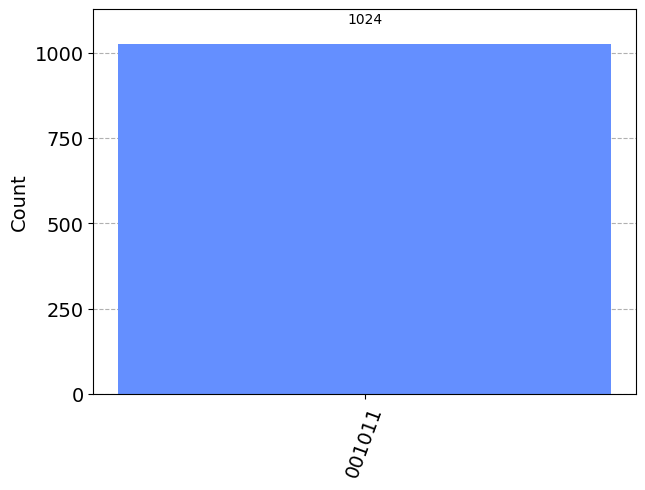

In [2]:
from qiskit.visualization import plot_histogram
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(bv_circuit)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

In [3]:
# Executa em um hardware quântico
# Carrega uma conta do IBMQ e obtém o dispositivo menos ocupado que tenha um número de qubits maior ou igual a (n+1)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))

# Transpila e executa
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit)

# Obtém os resultados
results = job.result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer, figsize=(20, 5))

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_19428/3588867999.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'